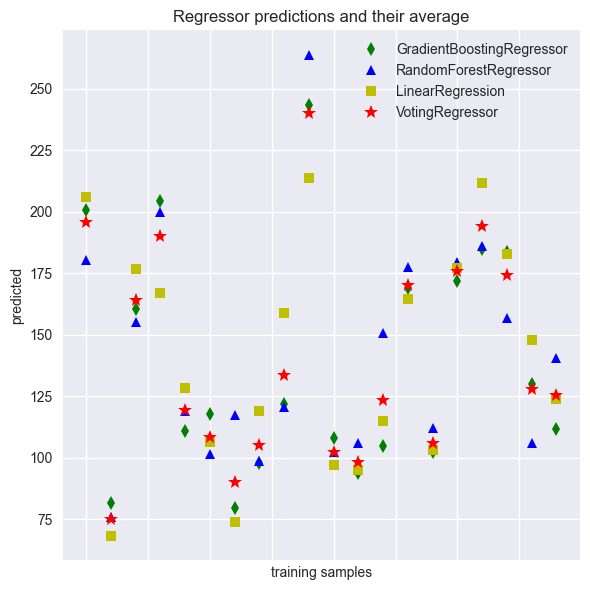

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap6\sourcecode")
# 导入绘图库
import matplotlib.pyplot as plt
# 导入数据集
from sklearn.datasets import load_diabetes
# 导入梯度提升回归
from sklearn.ensemble import GradientBoostingRegressor
# 导入随机森林
from sklearn.ensemble import RandomForestRegressor
# 导入线性模型
from sklearn.linear_model import LinearRegression
# 导入投票回归
from sklearn.ensemble import VotingRegressor
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
X, y = load_diabetes(return_X_y=True)
# 构建回归模型
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
# 模型拟合
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)
# 投票回归模型
ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
# 模型拟合
ereg.fit(X, y)
# 用于预测的X
xt = X[:20]
# 预测值
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)
fig, ax = plt.subplots(figsize=(6,6), tight_layout=True)
# 绘制预测的散点图
ax.plot(pred1, "gd", label="GradientBoostingRegressor")
ax.plot(pred2, "b^", label="RandomForestRegressor")
ax.plot(pred3, "ys", label="LinearRegression")
ax.plot(pred4, "r*", ms=10, label="VotingRegressor")
plt.tick_params(
    axis="x", which="both", bottom=False, 
    top=False, labelbottom=False
)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions and their average")
plt.show()
fig.savefig("../codeimage/code6.pdf")
